## Homework 2
From Chapter 3, found on pages 129-130 of ISLP

*This question involves the use of simple linear regression on the Auto data set*

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import warnings # for muting warning messages

# mute warning messages
warnings.filterwarnings('ignore')
# Import specific objects
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import OLSInfluence
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# Load dataset
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


a)	Produce a scatterplot matrix which includes all of the numeric variables in the data set.

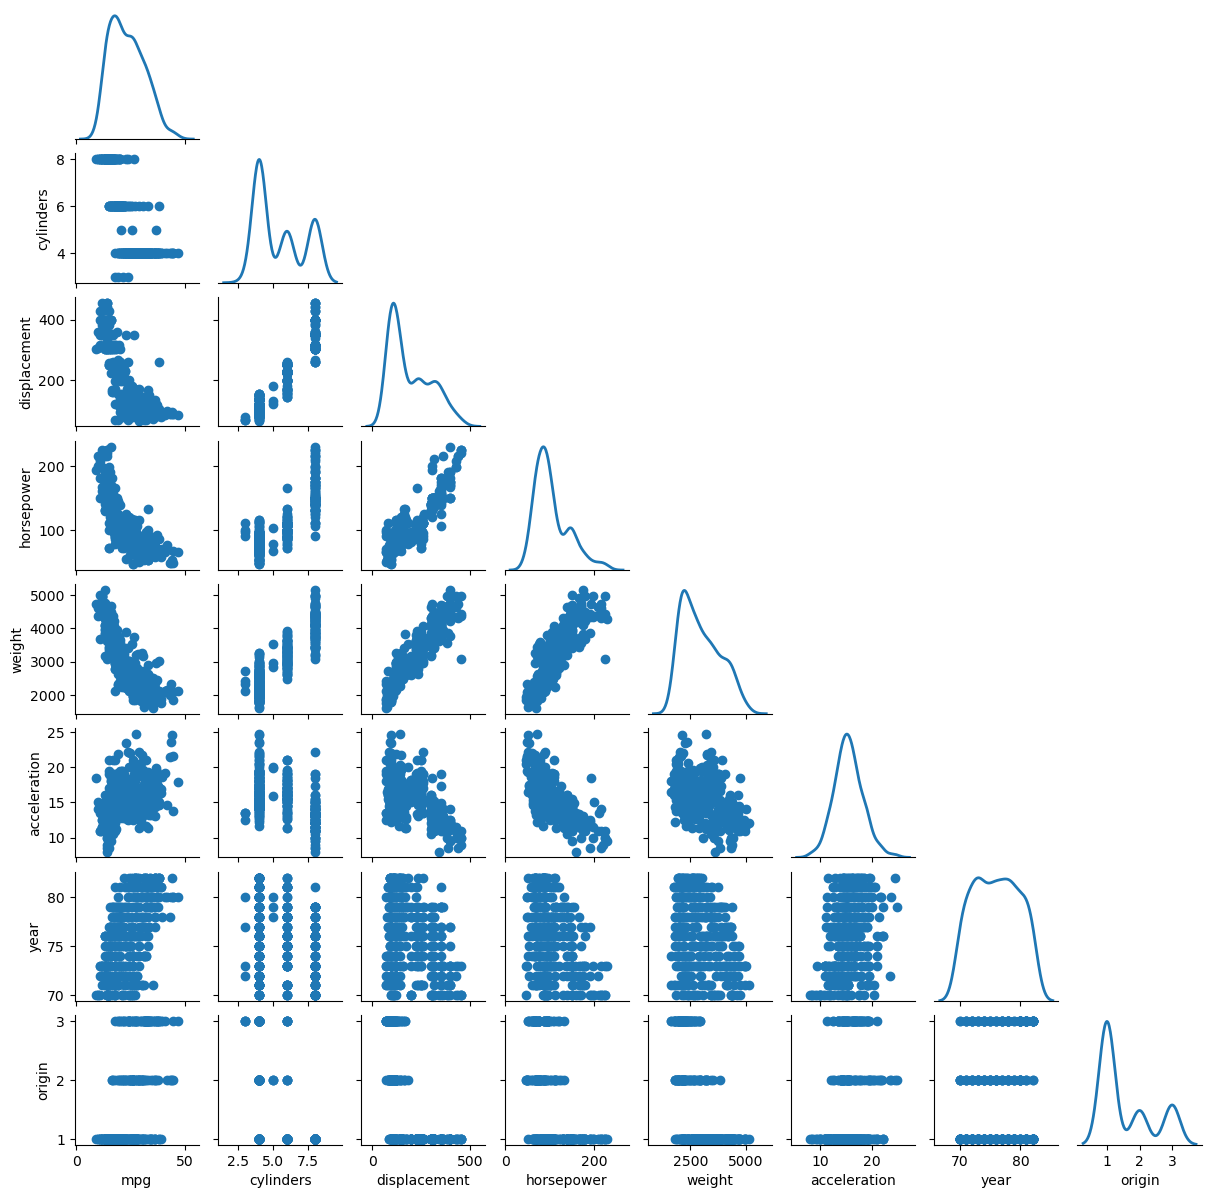

In [3]:
#Add your code here
sns_pmatrix = sns.PairGrid(Auto, diag_sharey = False, corner = True, layout_pad=0.7)

sns_pmatrix.map_lower(plt.scatter)
sns_pmatrix.map_diag(sns.kdeplot, lw=2, legend=False)

sns_pmatrix.fig.set_figheight(12)
sns_pmatrix.fig.set_figwidth(12)

b)	Compute the matrix of correlations between the variables using the `DataFrame.corr()` method, and print it.

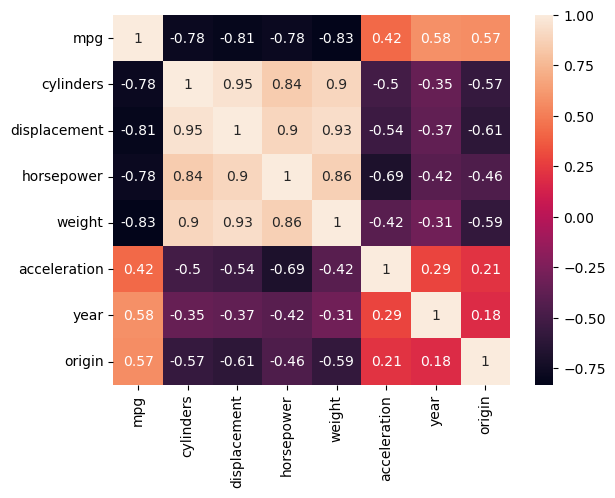

In [4]:
#Add your code here
quant_df = Auto.drop('name', axis = 1)
corr_M = quant_df.corr()

sns.heatmap(corr_M, annot= True);

c) Use the `sm.OLS()` function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the `model.summary()` function to print the results. Comment on the output: 

(i)  Is there a relationship between the predictors and the response?

(ii) Which predictors appear to have a statistically significant relationship to the response?

(iii) What does the coefficient for the year variable suggest ?

In [8]:
#Add your code here
y = Auto['mpg']
terms = Auto.columns.drop(['mpg', 'name']) 
X = MS(terms).fit_transform(Auto)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 31 May 2024   Prob (F-statistic):          2.04e-139
Time:                        19:37:03   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707   

i. There is a clearly visible correlation between some of the predictors and the response (target). F-statistics is much larger than unity and the probability Prob(F-stat) that this data can be generated if null hypothesis true is extremely low. This reflects the fact that we can reject the null hypothesis.

ii. Looking at p-values, we can say that displacement, weight, year and origin have high statistical relevance for the response whereas cylinders, horsepower and acceleration do not have some much statistically significant relationship with mpg.

iii. Year is one of the most important predictor in determining the response. One unit of change in year increases the mpg by 0.75 units.

d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

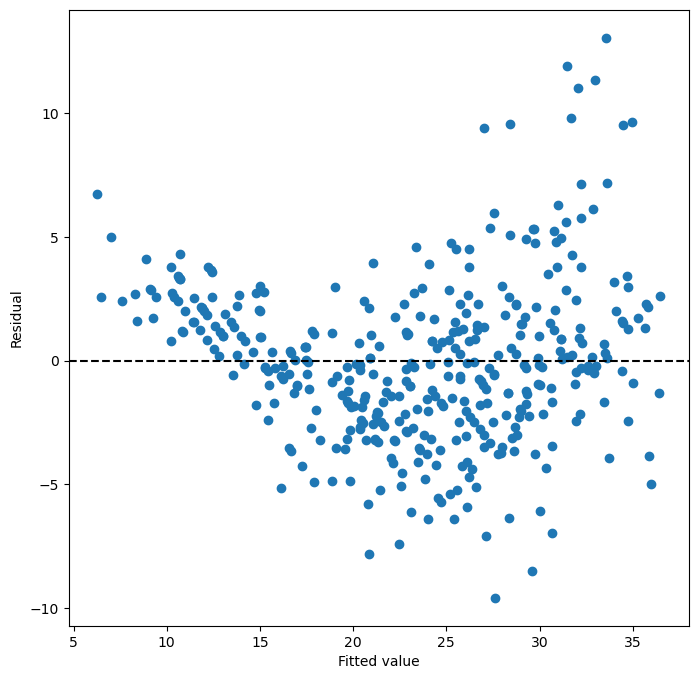

In [9]:
#Add your code here Residuals vs Fitted Values

ax = subplots(figsize=(8,8))[1]
ax.scatter(result.fittedvalues, result.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

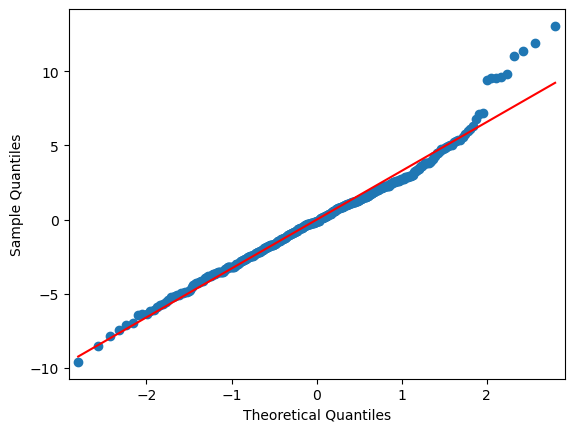

In [10]:
#Add your code here to plot QQ Plot
sm.qqplot(result.resid, line='s');

e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [11]:
#Add your code here
X['cylinders:weight'] = X['cylinders'] * X['weight']
X['year:weight'] = X['year'] * X['weight']
X['year:horsepower'] = X['year'] * X['horsepower']
X['origin:horsepower'] = X['origin'] * X['horsepower']
X['origin:displacement'] = X['origin'] * X['displacement']
X['weight:displacement'] = X['weight'] * X['displacement']
X['horsepower:displacement'] = X['horsepower'] * X['displacement']


model1 = sm.OLS(y, X)
result1 = model1.fit()
print(result1.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     197.4
Date:                Fri, 31 May 2024   Prob (F-statistic):          9.28e-164
Time:                        20:02:22   Log-Likelihood:                -945.69
No. Observations:                 392   AIC:                             1921.
Df Residuals:                     377   BIC:                             1981.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                 

f) Try a few different transformations of the variables, such as log⁡(X),√X,X^2. Comment on your findings.

In [13]:
#Add your code here

terms = Auto.columns.drop(['mpg', 'name']) 
X = MS(terms).fit_transform(Auto)

X['horsepowersq'] = np.power(X['horsepower'],2)
X['horsepowersqr'] = np.sqrt(X['horsepower'])
X['horsepowerlog'] = np.log(X['horsepower'])

model2 = sm.OLS(y, X)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     236.8
Date:                Fri, 31 May 2024   Prob (F-statistic):          1.02e-156
Time:                        20:06:59   Log-Likelihood:                -973.86
No. Observations:                 392   AIC:                             1970.
Df Residuals:                     381   BIC:                             2013.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      -318.1875    170.646     -1.865

Additional Practice Questions: 
- Explain the difference between MLR and OLS to a non-technical audience. 
- How would you describe this exercise in an interview to both a technical and non-technical interviewer? 
- What are the key insights you would want to show ? 
- Can you think of a business context where this exercise would have applications?